# Exercise 3: plot salinity and currents in the Ibiza Channel

The goal is to represent the latest (i.e. most recent) velocity field from a [HF radar system](http://socib.es/?seccion=observingFacilities&facility=radar) in the Ibiza Channel. 

## Import

We import matplotlib for the plot and netCDF4 to read the data.

In [11]:
import matplotlib.pyplot as plt
import netCDF4
import numpy as np
from matplotlib import rcParams
%matplotlib inline

In [12]:
rcParams.update({'font.size': 22})

# Data

Find the data URL by browsing the [thredds directory](http://thredds.socib.es/thredds/catalog/hf_radar/hf_radar_ibiza-scb_codarssproc001/L1/catalog.html). Select the file corresponding to the current month (January or February, depending when you do the exercise). 

In [3]:
datafile = "http://thredds.socib.es/thredds/dodsC/hf_radar/hf_radar_ibiza-scb_codarssproc001/L1/2016/dep0001_hf-radar-ibiza_scb-codarssproc001_L1_2016-03.nc"

Note that there is a file with the suffix latex.nc, which contains the data for the past and current month.<br>
As the name of this file does not change and its content is updating with new data, it can be sued to plot the most recent field.

## Read the variables

The variables to read are:
* the 2 components of the velocity
* the coordinates
* the time.

In [19]:
with netCDF4.Dataset(datafile) as nc:
    timeradar = nc.variables['time'][:]
    timeunits = nc.variables['time'].units
    lon = nc.variables['LON'][:]
    lat = nc.variables['LAT'][:]
    u = nc.variables['U'][:]
    v = nc.variables['V'][:]

# Make the plot

## Projection

Create a Mercator projection around the area of interest.<br>
Don't forget to import the [Basemap](http://matplotlib.org/basemap/) toolkit.

In [5]:
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl

In [6]:
m = Basemap(projection='merc', llcrnrlat=lat.min(), urcrnrlat=lat.max(),
            llcrnrlon=lon.min(), urcrnrlon=lon.max(), lat_ts=0.5*(lat.min()+lat.max()), resolution='i')

Compute the coordinates in the new projection.

In [7]:
longrid, latgrid = np.meshgrid(lon, lat)
lonproj, latproj = m(longrid, latgrid)

## Velocity field

Represent the most recent velocity field.<br>
**Hints:** 
* remember the index corresponding to the last element of a list or of an array is [-1],
* use [quiver](http://matplotlib.org/examples/pylab_examples/quiver_demo.html) to represent the velocity field. You can have all the arrows in the same color.

In [8]:
u2plot = u[-1, :, :]
v2plot = v[-1, :, :]

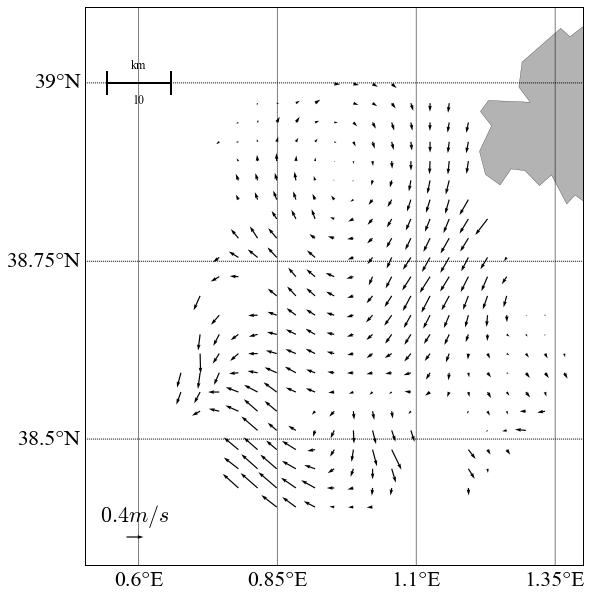

In [15]:
fig = plt.figure(figsize=(10,10))
Q = m.quiver(lonproj, latproj, u2plot, v2plot)
qk = plt.quiverkey(Q, 0.1, 0.05, 0.4, r'$0.4 m/s$',
                   fontproperties={'weight': 'bold'})
m.drawmapscale(0.6, 39., 0.6, 39., 10, barstyle='simple', units='km', fontsize=12)
m.drawparallels(np.arange(38.,39.25,.25), labels=[True,False,True,False], zorder=2)
m.drawmeridians(np.arange(0.6,1.5,.25), labels=[False,True,False,True], zorder=2)
m.drawcoastlines(linewidth=.25)
m.fillcontinents(color='.7')
plt.show()

Don't forget to add:
* the coastline
* a land mask,
* a reference vector,
* a map scale.

# Subsidiary question

* Make a similar figure, but now change the color of the arrows according to the current intensity.
* Add a title containing the date corresponding to the time of the measurements.

We compute the norm of the vectors.

In [17]:
uvnorm = (u2plot*u2plot + v2plot*v2plot)**0.5

For the title, we convert the time in readable units and take the last element of the array.

In [24]:
dateradar = netCDF4.num2date(timeradar, timeunits)

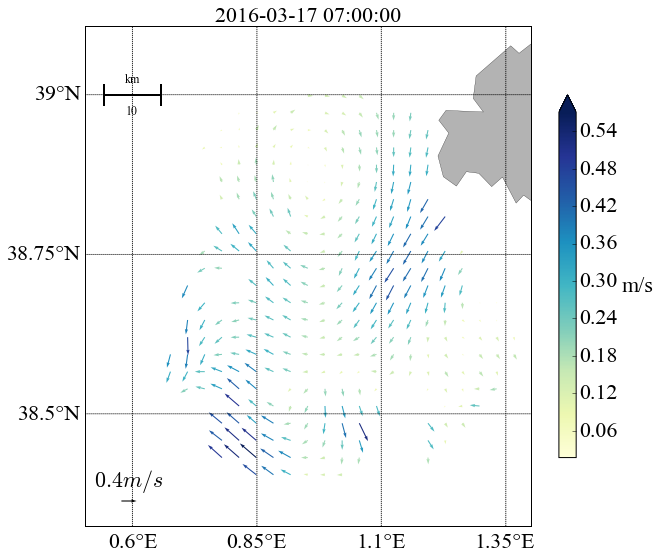

In [26]:
fig = plt.figure(figsize=(10,10))
Q = m.quiver(lonproj, latproj, u2plot, v2plot, uvnorm, cmap=plt.cm.YlGnBu)
qk = plt.quiverkey(Q, 0.1, 0.05, 0.4, r'$0.4 m/s$',
                   fontproperties={'weight': 'bold'})
cbar = plt.colorbar(extend='max', shrink=0.65)
cbar.set_label('m/s', rotation=0, horizontalalignment='left')
m.drawmapscale(0.6, 39., 0.6, 39., 10, barstyle='simple', units='km', fontsize=12)
m.drawparallels(np.arange(38.,39.25,.25), labels=[True,False,True,False], zorder=2)
m.drawmeridians(np.arange(0.6,1.5,.25), labels=[False,True,False,True], zorder=2)
m.drawcoastlines(linewidth=.25)
m.fillcontinents(color='.7')
plt.title(dateradar[-1], fontsize=22)
plt.show()
plt.close()

For a final version, we should simply increase the resolution of the projection.